# What is your favourite data science or machine learning algorithm or method?
## <center>Principal Component Analysis </center>


# Principal Component Analysis (PCA)

* PCA was invented in 1901 by Karl Pearson
* PCA is mostly used as a tool in exploratory data analysis 
* Dimentionality reduction method:  extracts low dimensional set of features from a high dimensional data set with a motive to capture as much information as possible.


# Genes mirror geography within Europe
Novembre, John & Johnson, Toby & Bryc, Katarzyna & Kutalik, Zoltan & R Boyko, Adam & Auton, Adam & Indap, Amit & King, Karen & Bergmann, Sven & Nelson, Matthew & Stephens, Matthew & Bustamante, Carlos. (2008). Genes Mirror Geography within Europe. Nature. 456. 274. 10.1038/nature07566. 
![alt text](EuropePCAGenes.png "Genes mirror geography within Europe")



# PCA explanation

# Prepare a presentation, with an example dataset of your choice, showing this method being applied.
## <center> Dataset: Under-five mortality rate (per 1,000 live births) from Gapminder
    # Explain what im going to present


# Analysis on the Under-five mortality rate (per 1,000 live births) from Gapminder

In [1]:
#Loading the under 5 child mortality data into a pandas dataframe
import pandas as pd  
file_path = 'data/gapminder_under5mortality_clean.csv'
child_mortality_df = pd.read_csv(file_path, index_col = 0)
print child_mortality_df.shape
child_mortality_df.head()

(184, 216)


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Under five mortality,,,,,,,,,,,,,,,,,,,,,
Afghanistan,468.58,468.58,468.58,468.58,468.58,468.58,469.98,469.98,469.98,469.98,...,116.3,113.2,110.4,107.6,105.0,102.3,99.5,96.7,93.9,91.1
Albania,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,...,19.5,18.7,17.9,17.3,16.6,16.0,15.5,14.9,14.4,14.0
Algeria,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,...,32.1,30.7,29.5,28.4,27.4,26.6,25.8,25.2,24.6,24.0
Angola,485.68,485.68,485.68,485.68,485.68,485.68,485.68,485.68,485.68,485.68,...,200.5,196.4,192.0,187.3,182.5,177.3,172.2,167.1,162.2,156.9
Antigua and Barbuda,473.60,469.77,465.97,462.20,458.47,454.76,451.08,447.43,443.82,440.23,...,11.8,11.3,10.9,10.4,9.9,9.5,9.1,8.7,8.4,8.1


# VISUALISE THE TIME SERIES DATA FOR SOME COUNTRIES

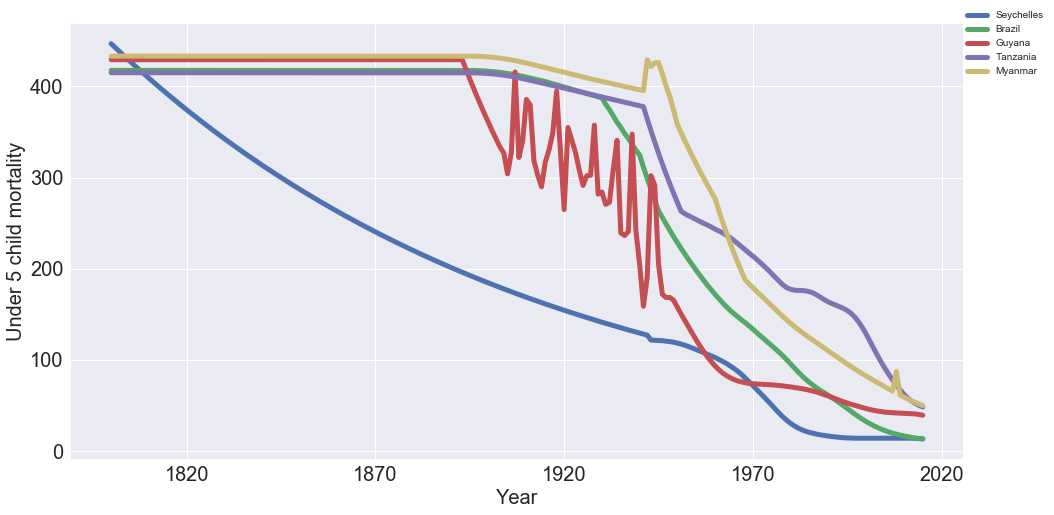

In [2]:
import data_visualisation_functions as plot
import matplotlib.pyplot as plt  

%matplotlib inline

plot.plot_timeseries_df(child_mortality_df.sample(n=5))

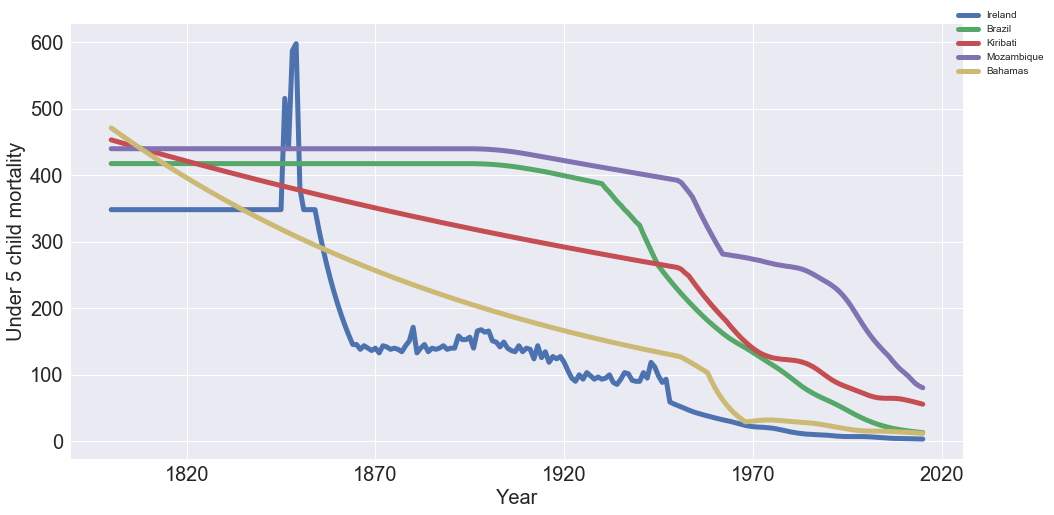

In [3]:
plot.plot_timeseries_df(child_mortality_df.sample(n=5))


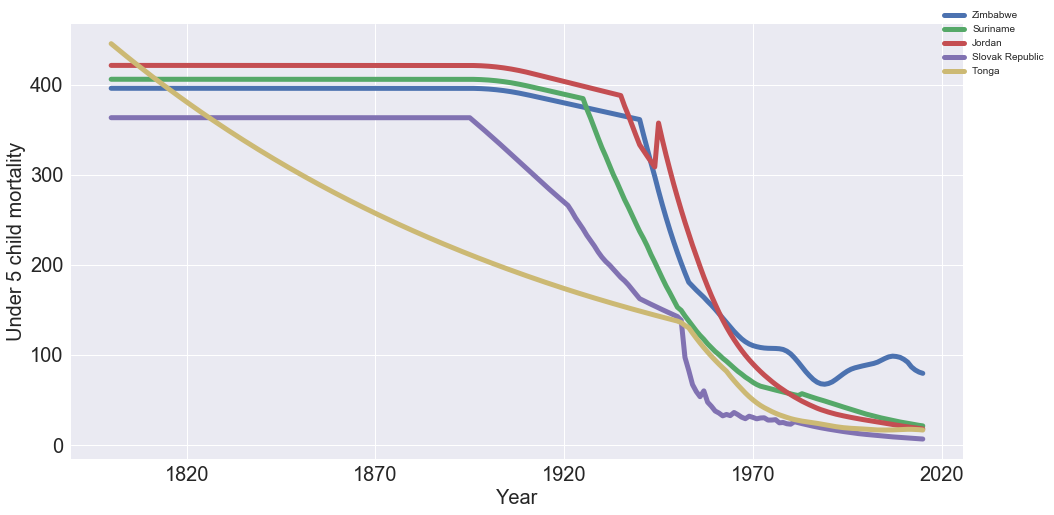

In [4]:
plot.plot_timeseries_df(child_mortality_df.sample(n=5))


# Principal Component Analysis on the time series data
By perfoming a dimensionality reduction with PCA it is possible to reduce those 215 variables to just a few, that best capture the trends in the data.

## Scaling the data

In [5]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(child_mortality_df)
scaled_child_mortality_df = pd.DataFrame(scaled_df, columns =child_mortality_df.columns, index =child_mortality_df.index)
scaled_child_mortality_df.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Under five mortality,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.670427,0.670427,0.720965,0.728932,0.732634,0.738263,0.695571,0.731171,0.686761,0.707986,...,0.573887,0.570248,0.568938,0.568723,0.497093,0.571429,0.572604,0.573592,0.573658,0.575484
Albania,0.242157,0.242157,0.358366,0.376688,0.385199,0.398142,0.286066,0.369554,0.265404,0.315181,...,0.084008,0.082128,0.080296,0.080087,0.068798,0.078286,0.078777,0.078134,0.077403,0.078065
Algeria,0.632040,0.632040,0.688463,0.697359,0.701492,0.707776,0.653359,0.693895,0.643327,0.667496,...,0.147773,0.144112,0.141574,0.140152,0.121124,0.138857,0.139330,0.140521,0.141074,0.142581
Angola,0.748853,0.748853,0.787365,0.793436,0.796257,0.800546,0.763405,0.791072,0.756557,0.773053,...,1.000000,1.000000,1.000000,1.000000,0.872578,1.000000,1.000000,1.000000,1.000000,1.000000
Antigua and Barbuda,0.693451,0.675885,0.710830,0.704866,0.695018,0.687926,0.613912,0.645135,0.570463,0.584691,...,0.045040,0.043905,0.043317,0.042749,0.036337,0.041143,0.041152,0.040581,0.039950,0.040000


# Implementing PCA
Once the data is properly scaled, it is time to obtain the principal components that contain most of the variance in the data. The sklearn library is used to estimate 4 principal components, that should contain 95% of the variance.

In [6]:
from  sklearn.decomposition  import PCA
# define the number of components and fit into the data
pca = PCA(n_components=4)
pca.fit(scaled_child_mortality_df)
#transform
child_mortality_4D = pca.transform(scaled_child_mortality_df)
#print the variance in each component
print "Variance in each component:" , pca.explained_variance_ratio_
print "Sum of variances:", round(sum(pca.explained_variance_ratio_),2)

Variance in each component: [0.7156319  0.15235747 0.04932878 0.03089097]
Sum of variances: 0.95


In [7]:
# Convert the transformed 'child_mortality_4D' data from a numPy array to a dataframe.
child_mortality_PC_df = pd.DataFrame(child_mortality_4D, columns =['PC1','PC2','PC3','PC4'] , index = scaled_child_mortality_df.index)
child_mortality_PC_df.head()

,PC1,PC2,PC3,PC4
Under five mortality,,,,
Afghanistan,4.201598,-0.840509,0.138748,-0.249803
Albania,-1.033939,0.038476,-0.941046,0.135291
Algeria,1.897379,0.883544,-0.240806,-0.632908
Angola,4.778313,-1.417156,0.963779,0.726820
Antigua and Barbuda,-3.074463,-0.578720,0.987558,-1.009795


# Visualising the data on the PC plane

The first to components carry aprox 87% of the variance. Projecting the countrys data into the PC1-PC2 plane can provide interesting relationships of the data.

Text(0,0.5,u'PC1')

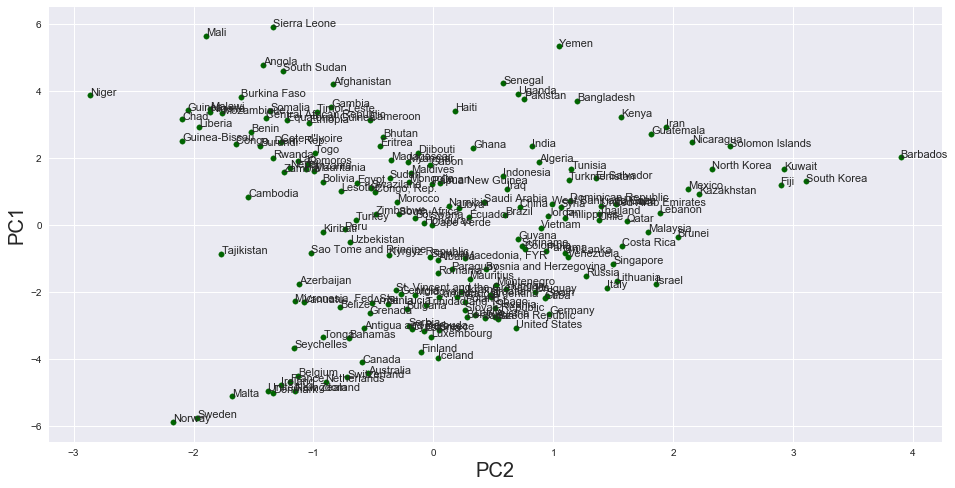

In [8]:
# compute scatter plot on PC1 and PC2
ax = child_mortality_PC_df.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8),color='DarkGreen',s = 30)

# add country names to the plot
for i, country in enumerate(child_mortality_PC_df.index):
    ax.annotate(country, (child_mortality_PC_df.iloc[i].PC2, child_mortality_PC_df.iloc[i].PC1),fontsize=11)

ax.set_xlabel('PC2', fontsize=20)
ax.set_ylabel('PC1',fontsize=20)

# Computing new descriptive metrics

Based on the PCA and features observed in the data the following metrics are computed:
* The country average value across the time series
* The change on the "Under 5 mortality" metric between 1800 and 2015
* The starting value observed in each country (1800)
* The slope on the change of the"Under 5 mortality" metric on the 20th century (before that the metric was stable for most countries).

All these metrics are computed from the data and standarised in order to have all in the same comparable scale.

### Country average value across the time series:

In [9]:
#compute the country average value from the scaled dataset, add it to the PC dataframe
child_mortality_PC_df['country_mean_scaled'] = pd.Series(scaled_child_mortality_df.mean(axis=1), index=scaled_child_mortality_df.index)

### The slope on the change of the"Under 5 mortality" metric on the 20th century


In [10]:
child_mortality_PC_df['country_change_slope'] = pd.Series((child_mortality_df['1900']-child_mortality_df['2000'])/float(2000-1900), index=child_mortality_df.index)
country_change_max = child_mortality_PC_df['country_change_slope'].max()
country_change_min = child_mortality_PC_df['country_change_slope'].min()
country_change_scaled = (child_mortality_PC_df.country_change_slope - country_change_min) / country_change_max
child_mortality_PC_df['country_change_slope_scaled'] = pd.Series(country_change_scaled, index=child_mortality_df.index)

In [11]:
child_mortality_PC_df[['PC1','PC2','PC3','PC4','country_mean_scaled',
                                        'country_change_slope_scaled']].head()

,PC1,PC2,PC3,PC4,country_mean_scaled,country_change_slope_scaled
Under five mortality,,,,,,
Afghanistan,4.201598,-0.840509,0.138748,-0.249803,0.735693,0.379062
Albania,-1.033939,0.038476,-0.941046,0.135291,0.385736,0.384311
Algeria,1.897379,0.883544,-0.240806,-0.632908,0.590964,0.493776
Angola,4.778313,-1.417156,0.963779,0.726820,0.780208,0.261124
Antigua and Barbuda,-3.074463,-0.578720,0.987558,-1.009795,0.255192,0.148850


# Using these new features in the 2D PC plane

Revisit the 2D figures of the countries in the PC1-PC2 plane, weighted by their value in these variables. 

correlation


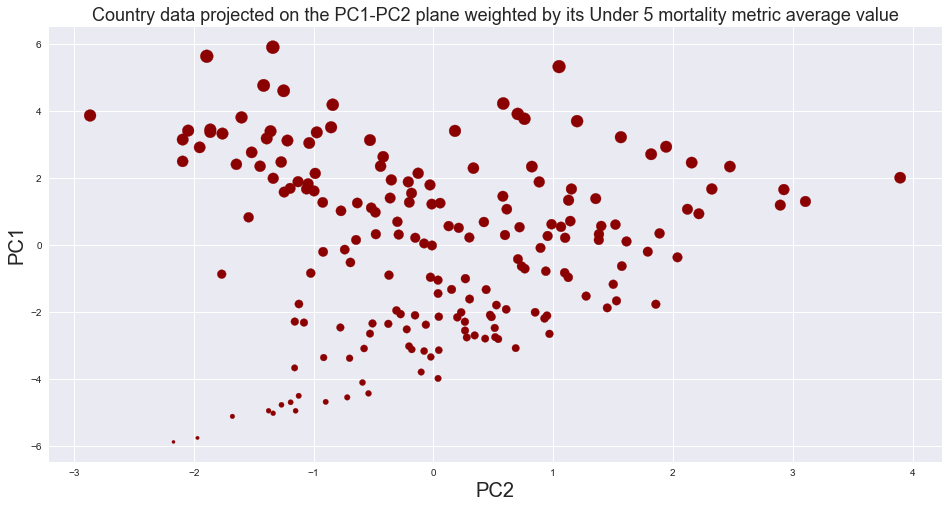

In [12]:
ax = child_mortality_PC_df.plot(kind='scatter', x='PC2', y='PC1', 
                                s=child_mortality_PC_df['country_mean_scaled']*200, figsize=(16,8),color='DarkRed')
ax.set_title('Country data projected on the PC1-PC2 plane weighted by '
             'its Under 5 mortality metric average value', fontsize=18)
ax.set_xlabel('PC2', fontsize=20)
ax.set_ylabel('PC1',fontsize=20)

print 'correlation'

correlation


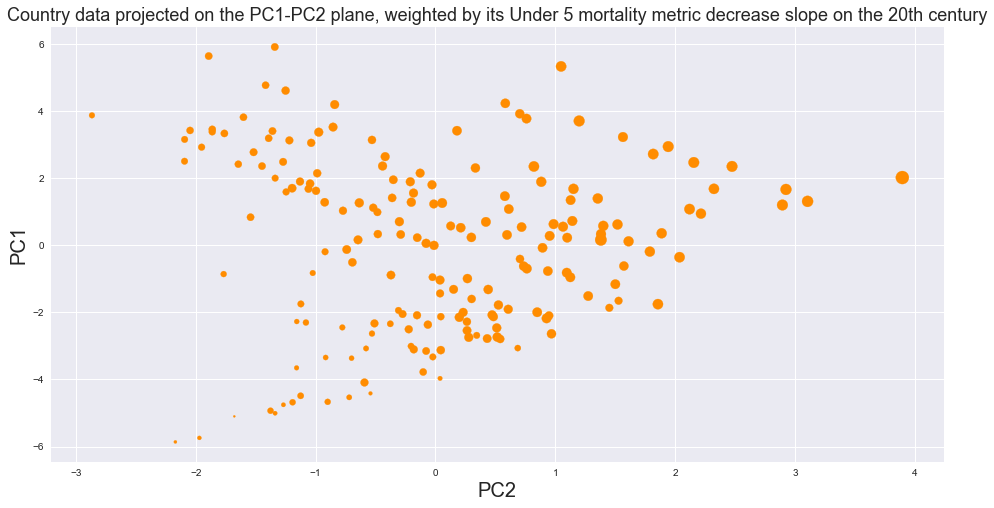

In [13]:
ax = child_mortality_PC_df.plot(kind='scatter', x='PC2', y='PC1', 
                                s=child_mortality_PC_df['country_change_slope_scaled']*200, figsize=(16,8),color='DarkOrange')
ax.set_title('Country data projected on the PC1-PC2 plane, weighted by '
             'its Under 5 mortality metric decrease slope on the 20th century', fontsize=18)
ax.set_xlabel('PC2', fontsize=20)
ax.set_ylabel('PC1',fontsize=20)

print "correlation"

# Using K-means clustering to explore structure in the data


In [14]:
from  sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)

clusters = kmeans.fit(scaled_child_mortality_df) 


In [15]:
child_mortality_PC_df['cluster'] = pd.Series(clusters.labels_, index=child_mortality_PC_df.index)
child_mortality_PC_df.head()

,PC1,PC2,PC3,PC4,country_mean_scaled,country_change_slope,country_change_slope_scaled,cluster
Under five mortality,,,,,,,,
Afghanistan,4.201598,-0.840509,0.138748,-0.249803,0.735693,3.4477,0.379062,3
Albania,-1.033939,0.038476,-0.941046,0.135291,0.385736,3.4819,0.384311,2
Algeria,1.897379,0.883544,-0.240806,-0.632908,0.590964,4.1951,0.493776,0
Angola,4.778313,-1.417156,0.963779,0.726820,0.780208,2.6793,0.261124,3
Antigua and Barbuda,-3.074463,-0.578720,0.987558,-1.009795,0.255192,1.9478,0.148850,1


## Visualising the clusters on the 2D principal component plane


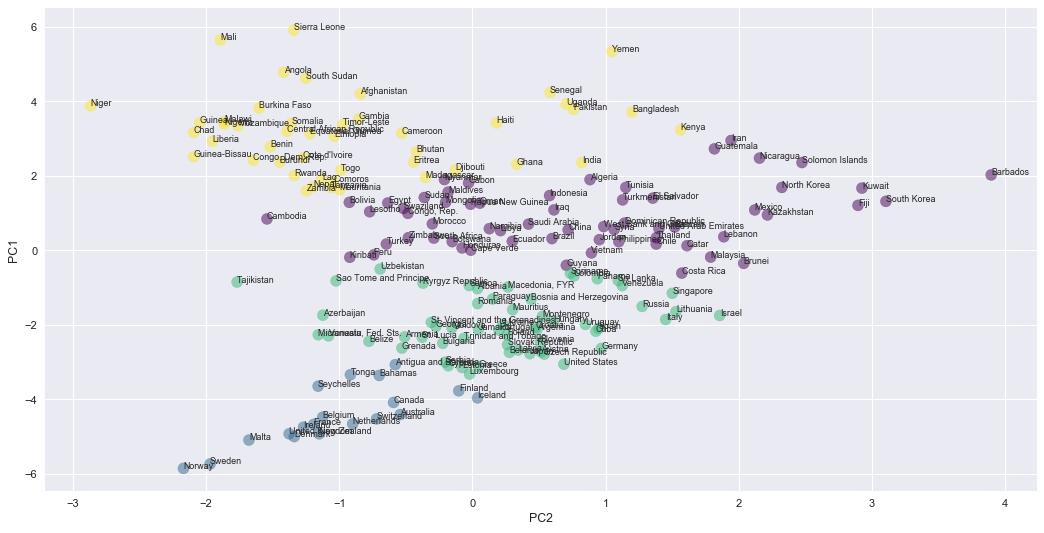

In [16]:
fig, ax = plt.subplots(figsize=(16, 8), dpi=80)
ax.scatter(child_mortality_PC_df['PC2'], child_mortality_PC_df['PC1'], alpha=0.5,
            s=100, c=child_mortality_PC_df['cluster'], cmap='viridis')

plt.xlabel('PC2')
plt.ylabel('PC1');

for i, country in enumerate(child_mortality_PC_df.index):
    ax.annotate(country, (child_mortality_PC_df.iloc[i].PC2, child_mortality_PC_df.iloc[i].PC1),fontsize=8)

## Investigating trends on the different clusters of countries: Average time series behaivour for each cluster of countries


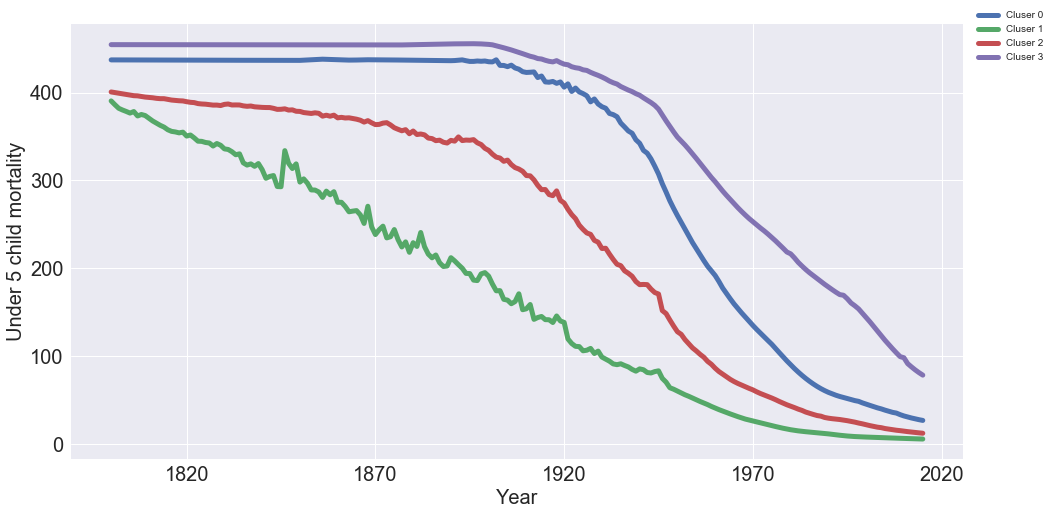

In [17]:
child_mortality_clustered = child_mortality_df.copy()
child_mortality_clustered['cluster'] = pd.Series(clusters.labels_, index=child_mortality_clustered.index)
plot.timeseries_for_clusters_mean(child_mortality_clustered)

# Relating different clusters with their GDP per-capita income :

Gapminder data...

In [19]:
gdp_file_path = 'data/gapminder_under5mortality_withGDP.csv'
child_mortality_clustered_gdp = pd.read_csv(gdp_file_path, index_col = 0)

child_mortality_clustered_gdp.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2008,2009,2010,2011,2012,2013,2014,2015,cluster,GDP
Under five mortality,,,,,,,,,,,,,,,,,,,,,
Afghanistan,468.58,468.58,468.58,468.58,468.58,468.58,469.98,469.98,469.98,469.98,...,110.4,107.6,105.0,102.3,99.5,96.7,93.9,91.1,0,1925.0
Albania,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,...,17.9,17.3,16.6,16.0,15.5,14.9,14.4,14.0,3,10620.0
Algeria,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,...,29.5,28.4,27.4,26.6,25.8,25.2,24.6,24.0,2,13434.0
Angola,485.68,485.68,485.68,485.68,485.68,485.68,485.68,485.68,485.68,485.68,...,192.0,187.3,182.5,177.3,172.2,167.1,162.2,156.9,0,7615.0
Antigua and Barbuda,473.60,469.77,465.97,462.20,458.47,454.76,451.08,447.43,443.82,440.23,...,10.9,10.4,9.9,9.5,9.1,8.7,8.4,8.1,1,21049.0
